In [1]:
from static_visualization import scanpath_visualization
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('../test_data/itog_fix_1_aoi.xlsx')
data = data[data["tekst"] == 15]

In [3]:
def remove_points(df, x_min, x_max, y_min, y_max):
    df = df[df['norm_pos_x'] <= x_max]
    df = df[df['norm_pos_x'] >= x_min]
    df = df[df['norm_pos_y'] >= y_min]
    df = df[df['norm_pos_y'] <= y_max]
    return df

# pic = "../test_data/output.png"
# width, height = None, None
# with Image.open(pic) as im:
#     width, height = im.size

## Visualization of areas of interest

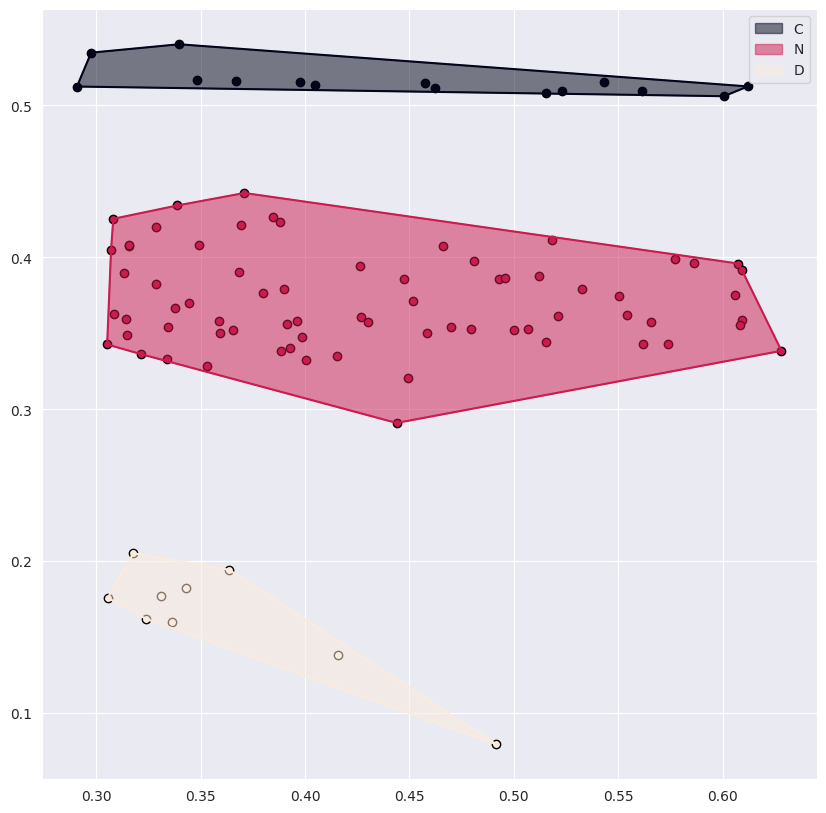

In [4]:
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", dispersion="dispersion", time_stamps="start_timestamp", aoi='AOI', show_legend=True, show_hull=True, only_points=True)

## Visualization of scanpath (enumeration of fixations; green vectors — saccades color; red vectors — regression color; "latest" vectors are darker)

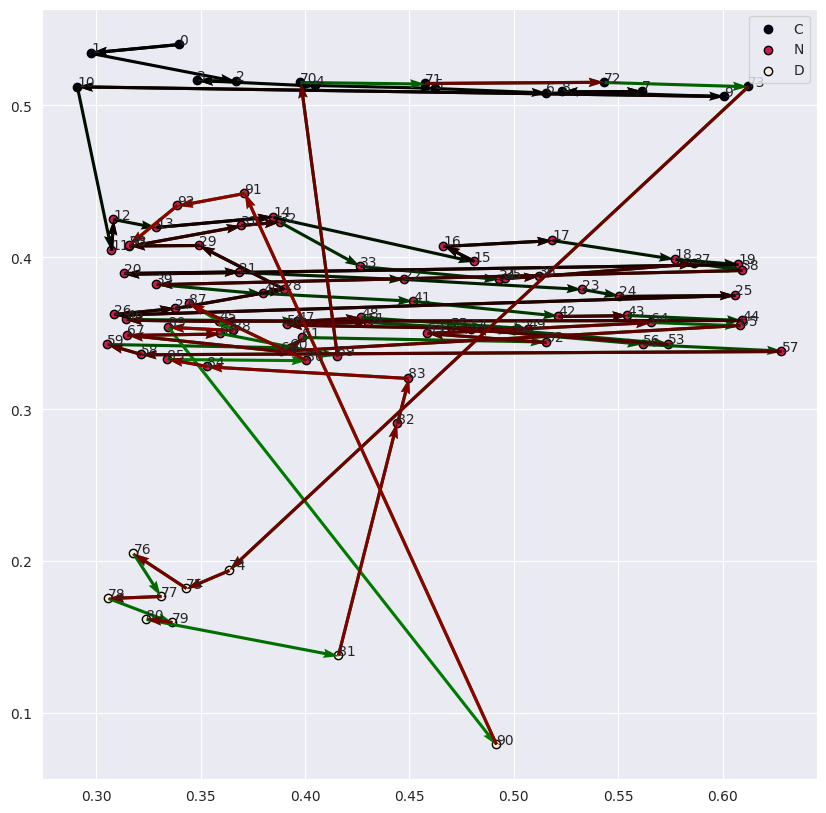

In [5]:
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", time_stamps="start_timestamp", aoi='AOI', show_legend=True, regression_color='red', seq_colormap=True, is_vectors=True, points_enumeration=True)

## Visualization of fixations (enumerated; the shape of the fixations depends on the duration; the color of the areas of interest has been changed)

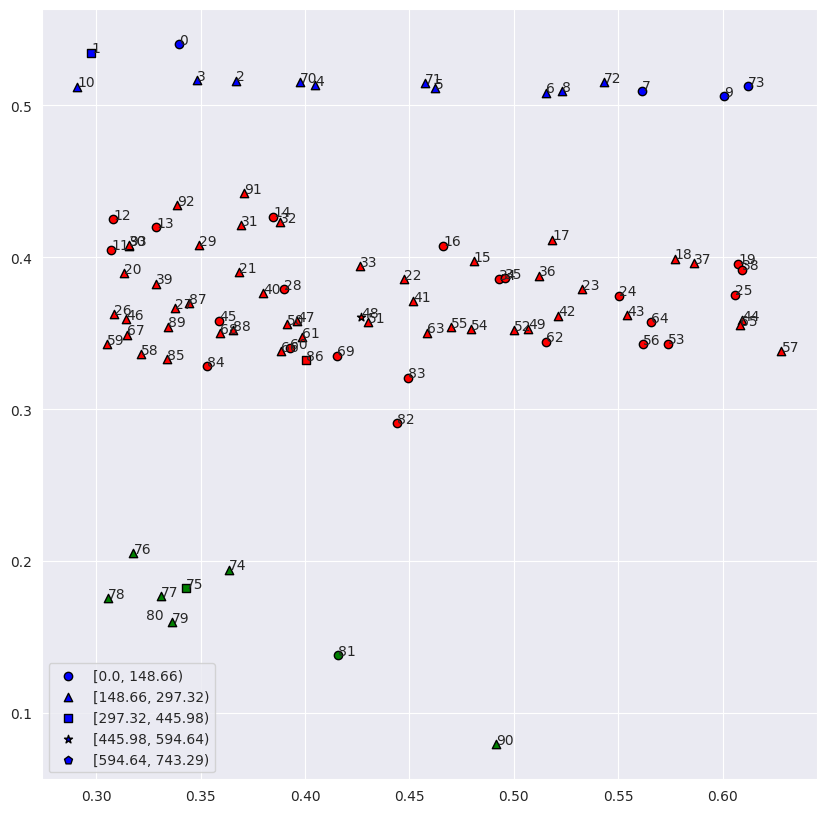

In [6]:
aoi_color = dict()
aoi_color['C'] = 'blue'
aoi_color['N'] = 'red'
aoi_color['D'] = 'green'
scanpath_visualization(data, "norm_pos_x", "norm_pos_y", time_stamps="start_timestamp", duration="duration", aoi='AOI', show_legend=True, points_enumeration=True, only_points=True, aoi_c=aoi_color)